Download Following Dataset and use five text(use randomly generated 5 numbers and extract the data of the generated numbers from the dataset) to test the assignments. https://www.kaggle.com/bittlingmayer/amazonreviews

1) one-hot coding of the following data using book codes (naive codes) of listing 6.1.

2) Also, provide one-hot coding using Keras built-in function (listing 6.3).

3) provide one-hot coding with hashing (listing 6.4)


4) Validate the how much they are similar. Try to maximize the similarity (ideally should be 100% the same). Specify the reason if both are not the same.

5) Try to implement word-embedding using code given in listing (6.7) and shared with me the embedding array as well as the word dictionary.

6) From 6.8 code pre-trained word-embeddings

7) Apply RNN to the given text (listing 6.21) and provide output

8) Match the results of RNN (step 7) with the step 5 and also with step

Share the output of the analysis.
Submit your assignment here https://forms.gle/ta88MoyAC8Fmsd4n7

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Importing Libraries


In [0]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import random, string, bz2, re
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle 
from keras.models import Model
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input, Conv1D, GlobalAveragePooling1D



Getting Data through online with wget library, extracting it & coping it to Amazon folder created in My Drive Folder

In [6]:
!wget https://storage.googleapis.com/amazonreviews/train.ft.txt.bz2
!wget https://storage.googleapis.com/amazonreviews/test.ft.txt.bz2
!bzip2 -dk train.ft.txt.bz2
!bzip2 -dk test.ft.txt.bz2
!mkdir "/content/drive/My Drive/Amazon Reviews"
!cp train.ft.txt  "/content/drive/My Drive/Amazon Reviews"
!cp test.ft.txt  "/content/drive/My Drive/Amazon Reviews"

--2020-06-13 18:07:11--  https://storage.googleapis.com/amazonreviews/train.ft.txt.bz2
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464275989 (443M) [application/x-bzip2]
Saving to: ‘train.ft.txt.bz2’

train.ft.txt.bz2    100%[===================>] 442.77M  65.2MB/s    in 9.0s    

2020-06-13 18:07:21 (49.2 MB/s) - ‘train.ft.txt.bz2’ saved [464275989/464275989]

--2020-06-13 18:07:23--  https://storage.googleapis.com/amazonreviews/test.ft.txt.bz2
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52653659 (50M) [application/x-bzip2]
Saving to: ‘test.ft.txt.bz2’

test.ft.txt.bz2     1

Opening Train & Test file & reading lines # we can also open file as bz2 extention but it takes more time & also require to decode with utf-8 & also lines does not break on \n code when we use print statement for showing our data so we will use open()


In [411]:
#train_data1 = bz2.BZ2File("drive/My Drive/train.ft.txt.bz2")
#train_data1 = train_data1.readlines()
#train_data1 = [x.decode('utf-8') for x in train_data1]

train_data = open("/content/drive/My Drive/Amazon Reviews/train.ft.txt", "r")
train_data = train_data.read().splitlines()
print(len(train_data)) 
type(train_data)

#test_data1 = bz2.BZ2File("drive/My Drive/test.ft.txt.bz2")
#test_data1 = test_data1.readlines()
#test_data1 = [x.decode('utf-8') for x in test_data1]

test_data = open("/content/drive/My Drive/Amazon Reviews/test.ft.txt", "r")
test_data = test_data.read().splitlines()
print(len(test_data))
type(test_data)

3600000
400000


list

Only Selecting Random 1% of data because data is too large (Train data = 36000, Test data = 4000)

In [0]:
train_len = int(len(train_data) / 100 * 1)
test_len = int(len(test_data) / 100 * 1)



In [0]:
import random
train_data = random.choices(train_data, k=train_len)
test_data = random.choices(test_data, k=test_len)

Seprating Text & Labels from Train data & sorting in .lower() texts

In [0]:
def splitReviewsLabels(lines):
    reviews = []
    labels = []
    for review in tqdm(lines):
        rev = reviewToX(review)   
        label = reviewToY(review)
        reviews.append(rev[0:1000]) #512
        labels.append(label)
    return reviews, labels

def reviewToY(review):
    return 1 if review.split(' ')[0] == '__label__1' else 0
  
def reviewToX(review):
    review = review.split(' ', 1)[1][:].lower()
    return review


In [415]:
data_train, label_train = splitReviewsLabels(train_data)
data_test, label_test = splitReviewsLabels(test_data)

100%|██████████| 4000/4000 [00:00<00:00, 136685.73it/s]


1) one-hot coding of the following data using book codes (naive codes) of listing 6.1.

In [0]:
samples = data_train[0:5]

In [417]:
samples

['action: superb cast and acting talent here! lots of action and drama in this one. enjoy it, i did as well!',
 'best of the bunch: of the myriad books about the bush administration, this one is certainly among the creme de la creme. this is not a screed by a reporter, pundit or "commentator" (although those can be fun too). dean knows his way around washington, and the white house, and indeed, around republican presidential administrations, from personal experience. dean\'s writing is engaging and effective, both because he pulls no punches, which is refreshing and rare, but also because he succeeds in large part in making the world of the washington insider accessible to the general public. i believe that this book, unlike many others, will be persuasive even to those who are not already inclined to think as dean does. i certainly think that, if you are looking for a book to give some perspective on the current presidential administration, you can do no better than to begin here.',
 

In [0]:

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [419]:
print(token_index)
print(type(token_index))
print(len(token_index))


{'action:': 1, 'superb': 2, 'cast': 3, 'and': 4, 'acting': 5, 'talent': 6, 'here!': 7, 'lots': 8, 'of': 9, 'action': 10, 'drama': 11, 'in': 12, 'this': 13, 'one.': 14, 'enjoy': 15, 'it,': 16, 'i': 17, 'did': 18, 'as': 19, 'well!': 20, 'best': 21, 'the': 22, 'bunch:': 23, 'myriad': 24, 'books': 25, 'about': 26, 'bush': 27, 'administration,': 28, 'one': 29, 'is': 30, 'certainly': 31, 'among': 32, 'creme': 33, 'de': 34, 'la': 35, 'creme.': 36, 'not': 37, 'a': 38, 'screed': 39, 'by': 40, 'reporter,': 41, 'pundit': 42, 'or': 43, '"commentator"': 44, '(although': 45, 'those': 46, 'can': 47, 'be': 48, 'fun': 49, 'too).': 50, 'dean': 51, 'knows': 52, 'his': 53, 'way': 54, 'around': 55, 'washington,': 56, 'white': 57, 'house,': 58, 'indeed,': 59, 'republican': 60, 'presidential': 61, 'administrations,': 62, 'from': 63, 'personal': 64, 'experience.': 65, "dean's": 66, 'writing': 67, 'engaging': 68, 'effective,': 69, 'both': 70, 'because': 71, 'he': 72, 'pulls': 73, 'no': 74, 'punches,': 75, 'whi

2) Also, provide one-hot coding using Keras built-in function (listing 6.3).



In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index


In [421]:
print(word_index)
print(type(word_index))
print(len(word_index))


{'the': 1, 'is': 2, 'a': 3, 'and': 4, 'i': 5, 'of': 6, 'this': 7, 'to': 8, 'that': 9, 'it': 10, 'no': 11, 'in': 12, 'as': 13, 'but': 14, 'case': 15, 'camera': 16, 'one': 17, 'too': 18, 'will': 19, 'you': 20, 'action': 21, 'here': 22, 'well': 23, 'administration': 24, 'certainly': 25, 'creme': 26, 'not': 27, 'those': 28, 'can': 29, 'be': 30, 'dean': 31, 'around': 32, 'washington': 33, 'presidential': 34, 'from': 35, 'because': 36, 'he': 37, 'which': 38, 'large': 39, 'believe': 40, 'book': 41, 'many': 42, 'are': 43, 'think': 44, 'does': 45, 'looking': 46, 'for': 47, 'do': 48, 'than': 49, 'nice': 50, 'made': 51, 'size': 52, 'small': 53, 'tech': 54, 'support': 55, '9': 56, 'had': 57, 'was': 58, 'up': 59, 'there': 60, 'all': 61, 'what': 62, 'waste': 63, 'superb': 64, 'cast': 65, 'acting': 66, 'talent': 67, 'lots': 68, 'drama': 69, 'enjoy': 70, 'did': 71, 'best': 72, 'bunch': 73, 'myriad': 74, 'books': 75, 'about': 76, 'bush': 77, 'among': 78, 'de': 79, 'la': 80, 'screed': 81, 'by': 82, 'rep

3) provide one-hot coding with hashing (listing 6.4)

In [0]:
dimensionality = 1000
max_length = 250 # max words in 1st sample
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

In [423]:
results.shape

(5, 250, 1000)

In [424]:
results[0,72,0:450]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [425]:
results[0,72,200:500]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

4) Validate the how much they are similar. Try to maximize the similarity (ideally should be 100% the same). Specify the reason if both are not the same.



In [0]:
# output of book 6.1 & 6.3 are pretty much similar because i sort whole code to .lower() so most problem solved here. Because in 6.1 code it take (The & THE & the) all as differnt word but 6.3 (The & THE & the) all are same word 
# 2nd problem for difference b/w both is in 6.1 it take (stop. & stop.: & stop.') all as different 3 words but in 6.3 all are count as stop & become 1 word as output also attach above search though ctrl+f shows result

5) Try to implement word-embedding using code given in listing (6.7) and shared with me the embedding array as well as the word dictionary.

In [435]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 250
max_words = 25000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_train)
sequences = tokenizer.texts_to_sequences(data_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(label_train)
print('Shape of data tensor:', type(data))
print('Shape of label tensor:', type(labels))


Found 73589 unique tokens.
Shape of data tensor: <class 'numpy.ndarray'>
Shape of label tensor: <class 'numpy.ndarray'>


In [437]:
data[0:100]

array([[   0,    0,    0, ...,  100,   22,   67],
       [   0,    0,    0, ...,    5, 1257,  206],
       [   0,    0,    0, ...,    7,    1,  454],
       ...,
       [   0,    0,    0, ...,   18,  173,  732],
       [   0,    0,    0, ...,  169,  161,  271],
       [   0,    0,    0, ...,    1,  794,  583]], dtype=int32)

In [438]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data,labels)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (27000, 250)
x_test : (9000, 250)
y_train : (27000,)
y_test : (9000,)


In [429]:
print(sequences[0:10])

[[21, 64, 65, 4, 66, 67, 22, 68, 6, 21, 4, 69, 12, 7, 17, 70, 10, 5, 71, 13, 23], [72, 6, 1, 73, 6, 1, 74, 75, 76, 1, 77, 24, 7, 17, 2, 25, 78, 1, 26, 79, 80, 26, 7, 2, 27, 3, 81, 82, 3, 83, 84, 85, 86, 87, 28, 29, 30, 88, 18, 31, 89, 90, 91, 32, 33, 4, 1, 92, 93, 4, 94, 32, 95, 34, 96, 35, 97, 98, 99, 100, 2, 101, 4, 102, 103, 36, 37, 104, 11, 105, 38, 2, 106, 4, 107, 14, 108, 36, 37, 109, 12, 39, 110, 12, 111, 1, 112, 6, 1, 33, 113, 114, 8, 1, 115, 116, 5, 40, 9, 7, 41, 117, 42, 118, 19, 30, 119, 120, 8, 28, 121, 43, 27, 122, 123, 8, 44, 13, 31, 45, 5, 25, 44, 9, 124, 20, 43, 46, 47, 3, 41, 8, 125, 126, 127, 128, 1, 129, 34, 24, 20, 29, 48, 11, 130, 49, 8, 131, 22], [132, 50, 14, 18, 133, 3, 23, 51, 50, 46, 15, 14, 134, 18, 39, 47, 135, 136, 137, 1, 16, 12, 7, 15, 138, 139, 1, 52, 6, 1, 16, 4, 140, 1, 141, 6, 142, 3, 53, 16, 5, 143, 7, 2, 3, 144, 6, 1, 145, 9, 7, 15, 2, 146, 8, 147, 148, 42, 149, 150, 5, 151, 10, 152, 13, 153, 13, 5, 154, 10, 4, 155, 3, 53, 156, 157, 158, 15, 38, 2, 

In [430]:
print('Found %s unique tokens.' % len(word_index))
import itertools
out = dict(itertools.islice(word_index.items(), 500))
out  

Found 201 unique tokens.


{'10': 195,
 '11': 171,
 '9': 56,
 'a': 3,
 'about': 76,
 'accessible': 114,
 'acting': 66,
 'action': 21,
 'administration': 24,
 'administrations': 96,
 'ago': 197,
 'all': 61,
 'almost': 152,
 'already': 122,
 'also': 108,
 'although': 87,
 'among': 78,
 'an': 135,
 'and': 4,
 'are': 43,
 'around': 32,
 'as': 13,
 'at': 201,
 'be': 30,
 'because': 36,
 'begin': 131,
 'believe': 40,
 'best': 72,
 'better': 130,
 'big': 133,
 'book': 41,
 'books': 75,
 'both': 103,
 'bunch': 73,
 'bush': 77,
 'but': 14,
 'by': 82,
 'camera': 16,
 'cameras': 150,
 'can': 29,
 'case': 15,
 'cast': 65,
 'cd': 191,
 'certainly': 25,
 'commentator': 86,
 'complaints': 182,
 'consequence': 144,
 'costly': 162,
 'creme': 26,
 'current': 129,
 'day': 178,
 'de': 79,
 'dean': 31,
 "dean's": 99,
 'defeats': 140,
 'designed': 146,
 'did': 71,
 'different': 149,
 'do': 48,
 'does': 45,
 "doesn't": 198,
 'doubles': 139,
 'dozen': 175,
 'drama': 69,
 'effective': 102,
 'engaging': 101,
 'enjoy': 70,
 'even': 120,
 

In [443]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(25000, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 250, 100)          2500000   
_________________________________________________________________
flatten_17 (Flatten)         (None, 25000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25001     
Total params: 2,525,001
Trainable params: 2,525,001
Non-trainable params: 0
_________________________________________________________________


In [444]:

history = model.fit(x_train,y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 22s 1ms/step - loss: 0.4467 - acc: 0.7886 - val_loss: 0.3114 - val_acc: 0.8702
Epoch 2/10
21600/21600 [==============================] - 22s 1ms/step - loss: 0.2355 - acc: 0.9076 - val_loss: 0.2884 - val_acc: 0.8828
Epoch 3/10
21600/21600 [==============================] - 22s 1ms/step - loss: 0.1577 - acc: 0.9423 - val_loss: 0.3088 - val_acc: 0.8833
Epoch 4/10
21600/21600 [==============================] - 22s 1ms/step - loss: 0.0946 - acc: 0.9715 - val_loss: 0.3318 - val_acc: 0.8754
Epoch 5/10
21600/21600 [==============================] - 22s 1ms/step - loss: 0.0517 - acc: 0.9865 - val_loss: 0.3683 - val_acc: 0.8722
Epoch 6/10
21600/21600 [==============================] - 22s 1ms/step - loss: 0.0260 - acc: 0.9939 - val_loss: 0.4024 - val_acc: 0.8739
Epoch 7/10
21600/21600 [==============================] - 22s 1ms/step - loss: 0.0129 - acc: 0.9967 - val_loss: 0.4442 - val_acc:

In [0]:
model.save_weights('pre_trained_glove_model.h5')


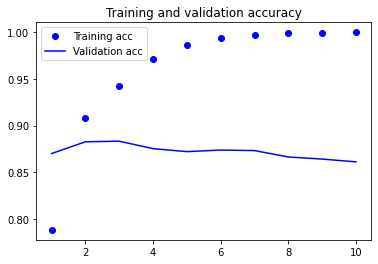

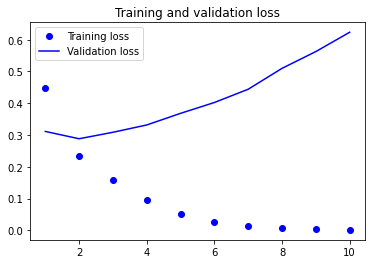

In [446]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [447]:
evaluation = model.evaluate(x_test,  y_test,batch_size=32, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")


Test loss : 58.271395697361896 %
Test accuracy : 85.84444522857666 %


6) From 6.8 code pre-trained word-embeddings

In [449]:
import os
glove_dir = '/content/drive/My Drive/glove'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [451]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(25000, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 250, 100)          2500000   
_________________________________________________________________
flatten_18 (Flatten)         (None, 25000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                800032    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 3,300,065
Trainable params: 3,300,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [453]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)
model.save_weights('pre_trained_glove_model.h5')

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 8s 352us/step - loss: 0.6116 - acc: 0.6623 - val_loss: 0.5283 - val_acc: 0.7391
Epoch 2/10
21600/21600 [==============================] - 7s 345us/step - loss: 0.4663 - acc: 0.7794 - val_loss: 0.5386 - val_acc: 0.7239
Epoch 3/10
21600/21600 [==============================] - 8s 361us/step - loss: 0.3827 - acc: 0.8277 - val_loss: 0.5339 - val_acc: 0.7454
Epoch 4/10
21600/21600 [==============================] - 8s 350us/step - loss: 0.3279 - acc: 0.8579 - val_loss: 0.7020 - val_acc: 0.6994
Epoch 5/10
21600/21600 [==============================] - 7s 344us/step - loss: 0.2726 - acc: 0.8840 - val_loss: 0.6398 - val_acc: 0.7367
Epoch 6/10
21600/21600 [==============================] - 7s 343us/step - loss: 0.2198 - acc: 0.9093 - val_loss: 0.6896 - val_acc: 0.7493
Epoch 7/10
21600/21600 [==============================] - 7s 347us/step - loss: 0.1697 - acc: 0.9305 - val_loss: 0.8811 - v

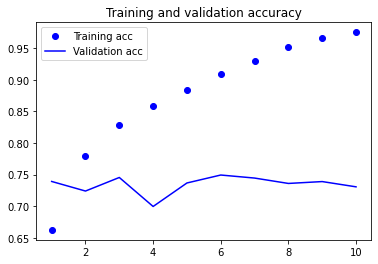

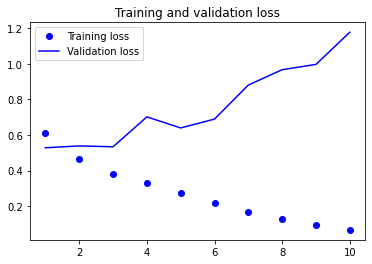

In [454]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7) Apply RNN to the given text (listing 6.21) and provide output


In [463]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(25000, 100))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 26s 1ms/step - loss: 0.5204 - acc: 0.7387 - val_loss: 0.4371 - val_acc: 0.7980
Epoch 2/10
21600/21600 [==============================] - 26s 1ms/step - loss: 0.2997 - acc: 0.8801 - val_loss: 0.3402 - val_acc: 0.8583
Epoch 3/10
21600/21600 [==============================] - 26s 1ms/step - loss: 0.2041 - acc: 0.9253 - val_loss: 0.3737 - val_acc: 0.8413
Epoch 4/10
21600/21600 [==============================] - 26s 1ms/step - loss: 0.1163 - acc: 0.9600 - val_loss: 0.3995 - val_acc: 0.8478
Epoch 5/10
21600/21600 [==============================] - 26s 1ms/step - loss: 0.0590 - acc: 0.9819 - val_loss: 0.4530 - val_acc: 0.8461
Epoch 6/10
21600/21600 [==============================] - 26s 1ms/step - loss: 0.0272 - acc: 0.9918 - val_loss: 0.5465 - val_acc: 0.8198
Epoch 7/10
21600/21600 [==============================] - 26s 1ms/step - loss: 0.0136 - acc: 0.9959 - val_loss: 0.5868 - val_acc:

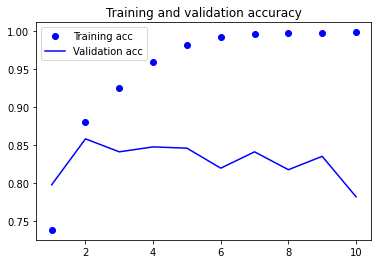

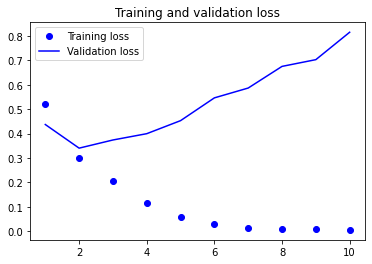

In [464]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()